# Real-world Data Wrangling

## Import libraries

In [153]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from matplotlib import ticker

## 1. Gather data


### **1.1.** Problem Statement

The goal is to see if car sales are affected by the change in fuel prices. Do car sales increase if fuel prices decrease and vise versa, or are they completely on affected?

### **1.2.** Getting the datasets

#### **Dataset 1**


Downloading the car sales dataset from kaggle using the kaggle API, which can be found here:

https://www.kaggle.com/datasets/mexwell/dvm-car

It is a .csv file

*Will only use the `Sales_table.csv` file*

Maker: the manufacturer of the car\
Genmodel: The model of the car\
Genmodel_ID: The id of the model\
Columns 2020-2001: Numbers of sales of a particualar car model in that year

##### Download the dataset

In [98]:
!kaggle datasets download -d mexwell/dvm-car --force

Dataset URL: https://www.kaggle.com/datasets/mexwell/dvm-car
License(s): other




  0%|          | 0.00/9.36M [00:00<?, ?B/s]
 11%|#         | 1.00M/9.36M [00:00<00:05, 1.47MB/s]
 21%|##1       | 2.00M/9.36M [00:00<00:03, 2.28MB/s]
 32%|###2      | 3.00M/9.36M [00:01<00:02, 2.68MB/s]
 43%|####2     | 4.00M/9.36M [00:01<00:01, 3.08MB/s]
 53%|#####3    | 5.00M/9.36M [00:02<00:01, 2.77MB/s]
 75%|#######4  | 7.00M/9.36M [00:02<00:00, 3.37MB/s]
 85%|########5 | 8.00M/9.36M [00:02<00:00, 3.39MB/s]
 96%|#########6| 9.00M/9.36M [00:03<00:00, 3.39MB/s]
100%|##########| 9.36M/9.36M [00:03<00:00, 3.38MB/s]
100%|##########| 9.36M/9.36M [00:03<00:00, 3.04MB/s]


##### Unzipping the dataset

In [99]:
with zipfile.ZipFile('./dvm-car.zip','r') as zip_ref:
    zip_ref.extractall('./CarsDataset')

In [100]:
carSalesDf = pd.read_csv('./CarsDataset/Sales_table.csv')

In [101]:
carSalesDf.columns

Index(['Maker', 'Genmodel', 'Genmodel_ID', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001'],
      dtype='object')

#### Dataset 2

`fuel_price.csv` dataset was downloaded manually from kaggle, can be found here:

https://www.kaggle.com/datasets/benten867/uk-fuel-price-weekly-statistics20032020

Important abbreviations: ULSP = Ultra low sulpur unleaded petrol, ULSD = Ultra low sulphur diesel


"Unnamed: 0": The index\
Date: date of entry taken\
"Pump price in pence/litre (ULSP)": As the name suggests\
"Pump price in pence/litre (ULSD)": As the name suggests\
"Duty rate in pence/litre (ULSP)": as the name suggests, where the duty rate is a type of tax\
"Duty rate in pence/litre (ULSD)": As the name suggests\
"VAT percentage rate (ULSP)": As the name suggests, where VAT stands for "Value Added Tax"\
"VAT percentage rate (ULSD)": As the name suggests: 

In [102]:
fuelPricesDf = pd.read_csv('./fuel price.csv')

In [103]:
fuelPricesDf.columns

Index(['Unnamed: 0', 'Date', 'Pump price in pence/litre (ULSP)',
       'Pump price in pence/litre (ULSD)', 'Duty rate in pence/litre (ULSP)',
       'Duty rate in pence/litre (ULSD)', 'VAT percentage rate (ULSP)',
       'VAT percentage rate (ULSD)'],
      dtype='object')

In [104]:
fuelPricesDf.head(1)

,Unnamed: 0,Date,Pump price in pence/litre (ULSP),Pump price in pence/litre (ULSD),Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5


## 2. Assess data


### Assessing `carSalesDf`

In [105]:
carSalesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        773 non-null    object
 1   Genmodel     773 non-null    object
 2   Genmodel_ID  773 non-null    object
 3   2020         773 non-null    int64 
 4   2019         773 non-null    int64 
 5   2018         773 non-null    int64 
 6   2017         773 non-null    int64 
 7   2016         773 non-null    int64 
 8   2015         773 non-null    int64 
 9   2014         773 non-null    int64 
 10  2013         773 non-null    int64 
 11  2012         773 non-null    int64 
 12  2011         773 non-null    int64 
 13  2010         773 non-null    int64 
 14  2009         773 non-null    int64 
 15  2008         773 non-null    int64 
 16  2007         773 non-null    int64 
 17  2006         773 non-null    int64 
 18  2005         773 non-null    int64 
 19  2004         773 non-null    

No missing data

In [106]:
carSalesDf.duplicated().sum()

0

No Duplicates

In [107]:
carSalesDf.head()

,Maker,Genmodel,Genmodel_ID,2020,2019,2018,2017,2016,2015,2014,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,ABARTH,ABARTH 124,2_1,0,19,27,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABARTH,ABARTH 500,2_2,0,0,1,2,66,717,762,...,915,766,0,0,0,0,0,0,0,0
2,ABARTH,ABARTH 595,2_4,2144,2866,3907,3295,3132,1612,516,...,0,0,0,0,0,0,0,0,0,0
3,ABARTH,ABARTH 695,2_6,45,65,270,114,29,10,14,...,0,0,0,0,0,0,0,0,0,0
4,ABARTH,ABARTH PUNTO,2_9,0,0,0,0,0,0,56,...,97,172,74,0,0,0,0,0,0,0


In [108]:
carSalesDf.describe()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,1979.454075,2818.445019,2862.076326,2963.058215,3203.897801,3132.236740,2915.015524,2628.974127,2314.923674,2131.992238,2165.604140,2041.534282,1941.636481,1976.517464,1626.055627,1325.930142,1058.534282,805.106080,564.614489,349.142303
std,5403.526805,7466.655137,7731.051191,8199.212870,9234.009443,9571.845809,9085.533712,8520.582424,7742.340436,7122.691281,7249.633197,7136.761258,6755.753065,6958.049764,5690.905348,4616.839607,3683.193277,2989.763318,2200.688401,1342.884560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,794.000000,1440.000000,1427.000000,1437.000000,1392.000000,1287.000000,946.000000,846.000000,684.000000,612.000000,674.000000,602.000000,560.000000,550.000000,480.000000,418.000000,224.000000,106.000000,62.000000,36.000000
max,46739.000000,74500.000000,89564.000000,87409.000000,113568.000000,125619.000000,122815.000000,113390.000000,100228.000000,87266.000000,91353.000000,100975.000000,73429.000000,77257.000000,68079.000000,58824.000000,43404.000000,32345.000000,26767.000000,15737.000000


Column values all make sense

No issues with structure nor accuracy for the `carSalesDf`

### Assessing `fuelPricseDf`

In [109]:
fuelPricesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        909 non-null    int64  
 1   Date                              909 non-null    object 
 2   Pump price in pence/litre (ULSP)  909 non-null    float64
 3   Pump price in pence/litre (ULSD)  909 non-null    float64
 4   Duty rate in pence/litre (ULSP)   909 non-null    float64
 5   Duty rate in pence/litre (ULSD)   909 non-null    float64
 6   VAT percentage rate (ULSP)        909 non-null    float64
 7   VAT percentage rate (ULSD)        909 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 56.9+ KB


No Null Data

In [110]:
fuelPricesDf.head()

,Unnamed: 0,Date,Pump price in pence/litre (ULSP),Pump price in pence/litre (ULSD),Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5
1,3,16/06/2003,74.47,76.69,45.82,45.82,17.5,17.5
2,4,23/06/2003,74.42,76.62,45.82,45.82,17.5,17.5
3,5,30/06/2003,74.35,76.51,45.82,45.82,17.5,17.5
4,6,07/07/2003,74.28,76.46,45.82,45.82,17.5,17.5


Some issues with the columns.

In [111]:
fuelPricesDf.duplicated().sum()

0

No duplicated data

In [112]:
fuelPricesDf.describe()

,Unnamed: 0,Pump price in pence/litre (ULSP),Pump price in pence/litre (ULSD),Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,456.000000,111.090583,115.631617,54.523080,54.523080,18.754125,18.754125
std,262.549995,18.308105,19.414181,4.664805,4.664805,1.532611,1.532611
min,2.000000,74.210000,76.410000,45.820000,45.820000,15.000000,15.000000
25%,229.000000,95.710000,99.180000,50.350000,50.350000,17.500000,17.500000
50%,456.000000,113.720000,118.110000,57.950000,57.950000,20.000000,20.000000
75%,683.000000,127.540000,132.600000,57.950000,57.950000,20.000000,20.000000
max,910.000000,142.170000,148.040000,58.950000,58.950000,20.000000,20.000000


No issues with accuracy

### Quality Issue 1:

In [113]:
fuelPricesDf['Date'].dtype

dtype('O')

In [114]:
type(fuelPricesDf['Date'][0])

str

The `Date` Column is a string, when it should be a datetime. Optimally, to better answer the question, the column should contain only the year.

### Quality Issue 2:

In [115]:
fuelPricesDf['Pump price in pence/litre (ULSP)'].dtype

dtype('float64')

In [116]:
fuelPricesDf['Pump price in pence/litre (ULSD)'].dtype

dtype('float64')

Instead of using a float to represent the pump prices, they should be represented as integers to help with calculations as well as help reduce with lowering memory.

### Tidiness Issue 1:

In [117]:
fuelPricesDf.head()

,Unnamed: 0,Date,Pump price in pence/litre (ULSP),Pump price in pence/litre (ULSD),Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5
1,3,16/06/2003,74.47,76.69,45.82,45.82,17.5,17.5
2,4,23/06/2003,74.42,76.62,45.82,45.82,17.5,17.5
3,5,30/06/2003,74.35,76.51,45.82,45.82,17.5,17.5
4,6,07/07/2003,74.28,76.46,45.82,45.82,17.5,17.5


The `Unamed: 0` Column is just an extra column to represent the index, it is not needed and should be dropped, as there is already an index column.

### Tidiness Issue 2: 

In [118]:
fuelPricesDf.head(1)

,Unnamed: 0,Date,Pump price in pence/litre (ULSP),Pump price in pence/litre (ULSD),Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5


The extra columns containing the tax information about importing the petrol are not necessary for calculating the necessary information for answering the question.

### Tidiness Issue 3: 

In [119]:
fuelPricesDf.head(1)

,Unnamed: 0,Date,Pump price in pence/litre (ULSP),Pump price in pence/litre (ULSD),Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5


The columns that will be used `Pump price in pence/litre (ULSP)` and `Pump price in pence/litre (ULSD)` should be renamed to a more concise name

## 3. Clean data


In [120]:
fuelPricesDfClean = fuelPricesDf.copy()

### **Quality Issue 1: Changing the `Date` column into a `Year` Column**

In [121]:
fuelPricesDfClean['Year'] = fuelPricesDfClean['Date'].apply(lambda x: x.split("/")[-1])

In [122]:
fuelPricesDfClean['Year'] = fuelPricesDfClean['Year'].astype(int)

In [123]:
fuelPricesDfClean.drop(['Date'],axis=1,inplace=True)

In [124]:
fuelPricesDfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        909 non-null    int64  
 1   Pump price in pence/litre (ULSP)  909 non-null    float64
 2   Pump price in pence/litre (ULSD)  909 non-null    float64
 3   Duty rate in pence/litre (ULSP)   909 non-null    float64
 4   Duty rate in pence/litre (ULSD)   909 non-null    float64
 5   VAT percentage rate (ULSP)        909 non-null    float64
 6   VAT percentage rate (ULSD)        909 non-null    float64
 7   Year                              909 non-null    int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 53.4 KB


It makes dealing with data a lot easier since the idea is to get fuel prices on a yearly basis

### **Quality Issue 2: Converting the useful columns from float to int to help with calculations and reduce memory**

In [125]:
fuelPricesDfClean['Pump price in pence/litre (ULSP)'] = fuelPricesDfClean['Pump price in pence/litre (ULSP)'].astype(int)

In [126]:
fuelPricesDfClean['Pump price in pence/litre (ULSD)'] = fuelPricesDfClean['Pump price in pence/litre (ULSD)'].astype(int)

In [127]:
fuelPricesDfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        909 non-null    int64  
 1   Pump price in pence/litre (ULSP)  909 non-null    int32  
 2   Pump price in pence/litre (ULSD)  909 non-null    int32  
 3   Duty rate in pence/litre (ULSP)   909 non-null    float64
 4   Duty rate in pence/litre (ULSD)   909 non-null    float64
 5   VAT percentage rate (ULSP)        909 non-null    float64
 6   VAT percentage rate (ULSD)        909 non-null    float64
 7   Year                              909 non-null    int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 46.3 KB


Converting these two columns to an integer will help with calculations and help with reducing memory

### **Tidiness Issue 1: Removal of purposeless column that used to represent indexes**

In [128]:
fuelPricesDfClean.drop(['Unnamed: 0'],axis=1,inplace=True)

In [129]:
fuelPricesDfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Pump price in pence/litre (ULSP)  909 non-null    int32  
 1   Pump price in pence/litre (ULSD)  909 non-null    int32  
 2   Duty rate in pence/litre (ULSP)   909 non-null    float64
 3   Duty rate in pence/litre (ULSD)   909 non-null    float64
 4   VAT percentage rate (ULSP)        909 non-null    float64
 5   VAT percentage rate (ULSD)        909 non-null    float64
 6   Year                              909 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 39.2 KB


The `Unnamed: 0` column is caused by an accidental saving of the dataset while including the index, it serves no purpose

### **Tidiness Issue 2: Removing the unnecessary columns**

In [130]:
fuelPricesDfClean.drop(['Duty rate in pence/litre (ULSP)','Duty rate in pence/litre (ULSD)','VAT percentage rate (ULSP)','VAT percentage rate (ULSD)'],axis=1,inplace=True)

In [131]:
fuelPricesDfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Pump price in pence/litre (ULSP)  909 non-null    int32
 1   Pump price in pence/litre (ULSD)  909 non-null    int32
 2   Year                              909 non-null    int32
dtypes: int32(3)
memory usage: 10.8 KB


Although the previously mentioned columns can help provide some information about where fuel prices come from, they are not necessary for answering the question.

### Tidiness Issue 3: Renaming some of the long formated columns into something more concise

In [132]:
fuelPricesDfClean.rename(columns={'Pump price in pence/litre (ULSP)': 'ULSP', 'Pump price in pence/litre (ULSD)':'ULSD'},inplace=True)

In [133]:
fuelPricesDfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ULSP    909 non-null    int32
 1   ULSD    909 non-null    int32
 2   Year    909 non-null    int32
dtypes: int32(3)
memory usage: 10.8 KB


### Combining Datasets

In [135]:
combinedDf = pd.concat([fuelPricesDfClean,carSalesDf])# Though combining is not needed

## 4. Update the data store

In [136]:
combinedDf.to_csv('./cleaned.csv')

In [139]:
carSalesDf.to_csv('./car_sales_clean.csv')

In [141]:
fuelPricesDfClean.to_csv('./fuel_prices_clean.csv')

## 5. Answer the research question

### **5.1:** Defining and answering the research question 


*Research question:* Are car sales are affected by the change in fuel prices?

In [137]:
carSalesDf.columns

Index(['Maker', 'Genmodel', 'Genmodel_ID', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001'],
      dtype='object')

In [147]:
carSalesPerYear = []
years=[]

for year in range(2001,2021,1):
    totalSales = carSalesDf[str(year)].sum()
    carSalesPerYear.append(totalSales)
    years.append(year)
    
    

In [146]:
carSalesPerYear

[269887,
 436447,
 622347,
 818247,
 1024944,
 1256941,
 1527848,
 1500885,
 1578106,
 1674012,
 1648030,
 1789436,
 2032197,
 2253307,
 2421219,
 2476613,
 2290444,
 2212385,
 2178658,
 1530118]

In [148]:
years

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

##### Total Car Sales every year

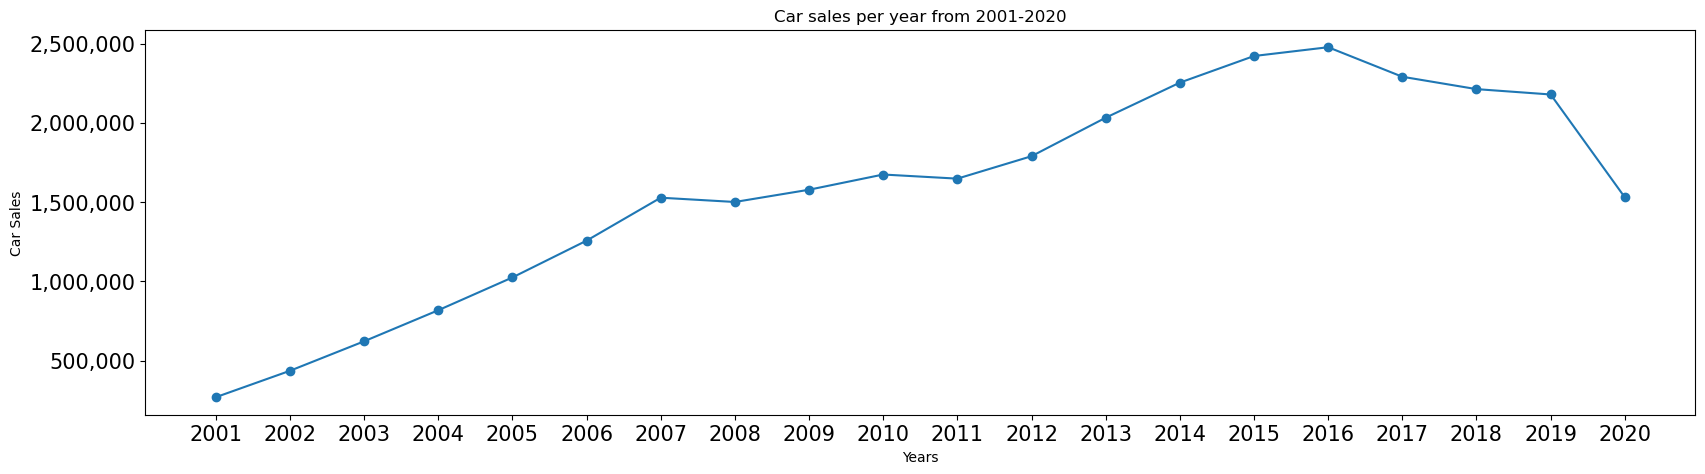

In [160]:
plt.figure(figsize=(20,5))
plt.scatter(years,carSalesPerYear)
plt.plot(years,carSalesPerYear)
plt.title("Car sales per year from 2001-2020")
plt.xlabel("Years")
plt.ylabel("Car Sales")
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().tick_params(axis='y', labelsize=15)
plt.gca().tick_params(axis='x', labelsize=15)
plt.xticks(years)

plt.show()

The trend seems to be throught the years, the number of car sales tended to increase up until 2016 where it decreased slightly. But in 2019-2020 it decrease significantly, it seems to be due to external factors such as the spread of covid-19 and the many quarantines, can be considered an outlier.

In [177]:
fuelPricesPerYear = fuelPricesDfClean.groupby('Year').mean()
fuelPricesPerYear

,ULSP,ULSD
Year,,
2003,75.200000,76.700000
2004,79.807692,81.423077
2005,86.307692,90.346154
2006,90.865385,94.596154
2007,94.037736,96.622642
2008,106.519231,117.076923
2009,99.134615,103.634615
2010,116.326923,118.730769
2011,132.923077,138.326923


In [178]:
fuelPricesPerYear.mean(axis=1)

Year
2003     75.950000
2004     80.615385
2005     88.326923
2006     92.730769
2007     95.330189
2008    111.798077
2009    101.384615
2010    117.528846
2011    135.625000
2012    138.471698
2013    136.942308
2014    130.019231
2015    112.586538
2016    109.211538
2017    118.365385
2018    127.018868
2019    127.807692
2020    116.568182
dtype: float64

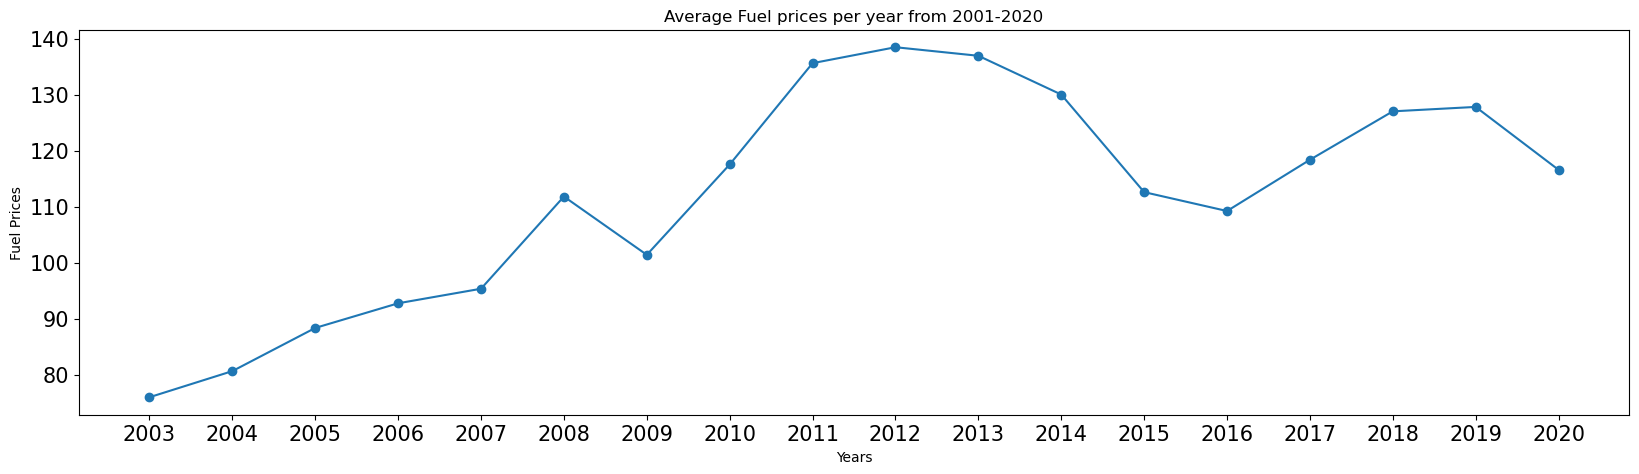

In [190]:
plt.figure(figsize=(20,5))
plt.scatter(years[2:],fuelPricesPerYear.mean(axis=1))
plt.plot(years[2:],fuelPricesPerYear.mean(axis=1))
plt.title("Average Fuel prices per year from 2003-2020")
plt.xlabel("Years")
plt.ylabel("Fuel Prices")
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().tick_params(axis='y', labelsize=15)
plt.gca().tick_params(axis='x', labelsize=15)
plt.xticks(years[2:])

plt.show()

Though not linear, the plot shows that fuel prices have been increasing throughtout the years, with the highest being in 2012

Comparing both the car sales and fuel prices graphs, it can be seen that regardless of any increase or decrease in fuel prices, car sales were not affected at all, except for exceptional circumstances such as quarantines. This indicates that people will not be deterred from purchasing cars if any change in fuel prices has occured.

### **5.2:** Reflection

If I had more time and resources, I would have liked to expand the dataset to include more car brands, sales and dates going back to the 1980s. I also would have liked to expand this idea to other countries, to see the affect of car sales globally.